In [1]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 194kB 7.2MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 


In [2]:
from fastai.tabular.all import *

In [11]:
path = untar_data(URLs.ADULT_SAMPLE)

In [12]:
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/export.pkl'),Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/models')]

In [13]:
df = pd.read_csv(path/'adult.csv')

In [14]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


TabularPandas

In [15]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']

In [17]:
cat = Categorify() 
# will transform columns that are in your cat_names 
#into that type along with label encoding our categorical data
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
salary             object
dtype: object

In [18]:
to = TabularPandas(df, cat, cat_names)

In [28]:
to.__dict__

{'cat_names': (#6) ['workclass','education','marital-status','occupation','relationship','race'],
 'cont_names': (#0) [],
 'dataloaders': <bound method FilteredBase.dataloaders of        age  workclass  fnlwgt  ...  hours-per-week  native-country  salary
 0       49          5  101320  ...              40   United-States   >=50k
 1       44          5  236746  ...              45   United-States   >=50k
 2       38          5   96185  ...              32   United-States    <50k
 3       38          6  112847  ...              40   United-States   >=50k
 4       42          7   82297  ...              50   United-States    <50k
 ...    ...        ...     ...  ...             ...             ...     ...
 32556   36          5  297449  ...              40   United-States   >=50k
 32557   23          1  123983  ...              40   United-States    <50k
 32558   53          5  157069  ...              40   United-States   >=50k
 32559   32          3  217296  ...              22   United-

In [26]:
to.procs

Pipeline: Categorify -- {'classes': {'workclass': ['#na#', ' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'], 'education': ['#na#', ' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college'], 'marital-status': ['#na#', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed'], 'occupation': ['#na#', ' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair', ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service', ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support', ' Transport-moving'], 'relationship': ['#na#', ' Husband', ' Not-in-family', ' Other-relative', ' Own-child', ' Unmarried', ' Wife'], 'race': ['#na#', ' Amer-Ind

In [19]:
cats = to.procs.categorify

In [20]:
cats['race'] # looking at catgories

['#na#', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']

In [21]:
cats = to.procs.categorify

In [22]:
cats['race']

['#na#', ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other', ' White']

In [23]:
to.show(max_n=3)

,workclass,education,marital-status,occupation,relationship,race
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White
1,Private,Masters,Divorced,Exec-managerial,Not-in-family,White
2,Private,HS-grad,Divorced,#na#,Unmarried,Black


In [33]:
to.cats.head()

,workclass,education,marital-status,occupation,relationship,race
0,5,8,3,0,6,5
1,5,13,1,5,2,5
2,5,12,1,0,5,3
3,6,15,3,11,1,2
4,7,6,3,9,6,3


Normalise

In [35]:
norm = Normalize()

# norm = NormalizeTa() doesn;t work nnow
# to properly work with our numerical columns we nned to show a relationship between
# them and all that our model can understand

In [36]:
cont_names

['age', 'fnlwgt', 'education-num']

In [38]:
to = TabularPandas(df, norm, cont_names=cont_names)

In [40]:
norms = to.procs.normalize

In [41]:
norms.means

{'age': 38.58164675532078,
 'education-num': 10.079815864562988,
 'fnlwgt': 189778.36651208502}

In [42]:
norms.stds

{'age': 13.640223192304274,
 'education-num': 2.573042731149292,
 'fnlwgt': 105548.3568809906}

In [43]:
to.conts.head()

,age,fnlwgt,education-num
0,0.763796,-0.838084,0.746270
1,0.397233,0.444987,1.523560
2,-0.042642,-0.886734,NaN
3,-0.042642,-0.728873,1.912205
4,0.250608,-1.018314,NaN


FillMissing

In [45]:
fm = FillMissing(fill_strategy=FillStrategy.median)

In [46]:
to = TabularPandas(df, fm, cont_names=cont_names)

In [47]:
to.conts.head()

,age,fnlwgt,education-num
0,49,101320,12.0
1,44,236746,14.0
2,38,96185,10.0
3,38,112847,15.0
4,42,82297,10.0


In [48]:
to.cat_names

(#1) ['education-num_na']

In [49]:
to.cats.head()

,education-num_na
0,False
1,False
2,True
3,False
4,True


splits

In [50]:
splits = RandomSplitter()(range_of(df))

In [51]:
splits

((#26049) [28078,21554,23583,28336,8208,29082,27114,13050,12656,7702...],
 (#6512) [20292,2855,7465,21723,10887,18191,28916,22914,10700,21115...])

In [52]:
range_of(df)[:5], len(df)

([0, 1, 2, 3, 4], 32561)

In [54]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']

procs = [Categorify, FillMissing, Normalize]
y_names = 'salary'
y_block = CategoryBlock()

In [56]:
to = TabularPandas(df, procs=procs, cat_names = cat_names, cont_names=cont_names, y_names=y_names, y_block=y_block, splits=splits)

In [57]:
dls = to.dataloaders()

In [58]:
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,False,46.000000,106254.998450,10.0,<50k
1,Private,7th-8th,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,False,46.000000,138370.000762,4.0,<50k
2,Private,HS-grad,Divorced,Other-service,Not-in-family,Asian-Pac-Islander,False,59.000001,98350.000142,9.0,<50k
3,Without-pay,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,False,52.000000,198261.999794,9.0,<50k
4,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,False,26.000000,106405.997661,10.0,<50k
5,Private,HS-grad,Never-married,Sales,Not-in-family,Black,False,41.000000,279297.002603,9.0,<50k
6,Private,Bachelors,Never-married,Other-service,Own-child,White,False,25.000000,49091.995106,13.0,<50k
7,Private,HS-grad,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,False,46.000000,195023.000120,9.0,<50k
8,Private,Assoc-voc,Married-civ-spouse,Handlers-cleaners,Husband,Black,False,40.000000,256201.997834,11.0,<50k
9,Private,Bachelors,Never-married,Tech-support,Not-in-family,White,False,32.000000,144064.000109,13.0,<50k


In [59]:
trn_dl = TabDataLoader(to.train, bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [60]:
dls = DataLoaders(trn_dl, val_dl)
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Some-college,Never-married,Sales,Not-in-family,Black,False,53.999999,133050.001100,10.0,<50k
1,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,False,36.000000,112496.999228,13.0,<50k
2,Private,Assoc-voc,Widowed,Prof-specialty,Not-in-family,White,False,72.999999,183212.999856,11.0,>=50k
3,Federal-gov,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,False,60.000001,119831.999812,10.0,>=50k
4,Self-emp-inc,10th,Married-civ-spouse,Transport-moving,Wife,White,False,57.999999,183870.000022,6.0,<50k
5,State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,False,32.000000,92002.998958,13.0,>=50k
6,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,False,47.000000,107230.998162,16.0,>=50k
7,Local-gov,Some-college,Divorced,Adm-clerical,Not-in-family,White,False,55.999999,129761.998782,10.0,<50k
8,Federal-gov,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,False,49.000000,105586.000164,11.0,>=50k
9,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,False,34.000000,108115.997104,13.0,>=50k


In [61]:
to._dbunch_type

fastai.tabular.data.TabularDataLoaders

In [62]:
dls._dbunch_type

fastai.tabular.data.TabularDataLoaders

TabularLearner

In [63]:
def get_emb_sz(to, sz_dict=None):
  return [_one_emb_sz(to.classes,n, sz_dict) for n in to.cat_names]

In [64]:
def _one_emb_sz(classes, n, sz_dict=None):
  sz_dict = ifnone(sz_dict, {})
  n_cat = len(classes[n])
  sz = sz_dict.get(n, int(emb_sz_rule(n_cat)))
  return n_cat, sz

In [65]:
emb_szs = get_emb_sz(to)

In [66]:
emb_szs

[(10, 6), (17, 8), (8, 5), (16, 8), (7, 5), (6, 4), (3, 3)]

In [67]:
to.cat_names

(#7) ['workclass','education','marital-status','occupation','relationship','race','education-num_na']

In [69]:
to['workclass'].nunique()

9

Numerical Variables

In [70]:
cont_len = len(to.cont_names)

In [71]:
cont_len

3

TabularModel

In [72]:
batch = dls.one_batch()

In [73]:
len(batch)

3

In [74]:
batch[0][0], batch[1][0]

(tensor([ 5, 10,  5,  5,  2,  5,  1]), tensor([1.1293, 0.1464, 1.1461]))

In [75]:
net = TabularModel(emb_szs, cont_len, 2, [200, 100])

In [76]:
net

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(42, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=42, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [77]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.015848932787775993)

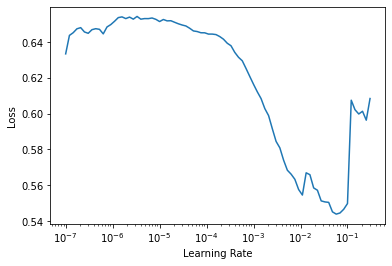

In [78]:
learn.lr_find()

In [79]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.367264,0.359593,0.835227,00:06
1,0.368223,0.355466,0.837684,00:06
2,0.349788,0.352237,0.836456,00:06


In [80]:
dls = to.dataloaders(bs=1024)

In [81]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.001737800776027143)

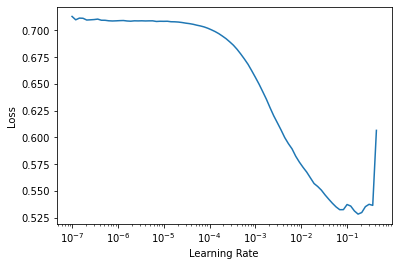

In [82]:
learn.lr_find()

In [83]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.393289,0.421333,0.809736,00:01
1,0.369500,0.360961,0.836609,00:01
2,0.360022,0.363598,0.833231,00:01


In [84]:
dls = to.dataloaders(bs=4096)
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.001737800776027143)

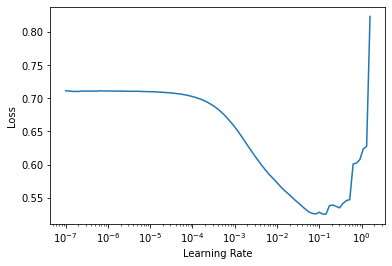

In [85]:
learn.lr_find()

In [86]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.525001,0.570139,0.780252,00:00
1,0.445209,0.506554,0.789312,00:00
2,0.413862,0.487162,0.796683,00:00


Labelled Test Sets

In [87]:
learn.export('myModel.pkl')

In [89]:
del learn

In [90]:
learn = load_learner('myModel.pkl')``

In [91]:
dl = learn.dls.test_dl(df.iloc[:100])

In [92]:
dl.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,False,49.0,101319.998186,12.0,>=50k
1,Private,Masters,Divorced,Exec-managerial,Not-in-family,White,False,44.0,236745.998799,14.0,>=50k
2,Private,HS-grad,Divorced,#na#,Unmarried,Black,True,38.0,96185.003119,10.0,<50k
3,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,False,38.0,112847.002671,15.0,>=50k
4,Self-emp-not-inc,7th-8th,Married-civ-spouse,Other-service,Wife,Black,True,42.0,82297.000436,10.0,<50k
5,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,False,20.0,63209.998081,9.0,<50k
6,Private,Some-college,Divorced,#na#,Other-relative,White,False,49.0,44433.997047,10.0,<50k
7,Private,11th,Married-civ-spouse,#na#,Husband,White,False,37.0,138939.998487,7.0,<50k
8,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,46.0,328216.000776,9.0,>=50k
9,Self-emp-inc,HS-grad,Married-civ-spouse,#na#,Husband,White,True,36.0,216710.999139,10.0,>=50k


In [93]:
df2 = df.iloc[:100].drop('salary', axis=1)

In [94]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States


In [95]:
dl = learn.dls.test_dl(df2)

In [96]:
dl.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,False,49.0,101319.998186,12.0
1,Private,Masters,Divorced,Exec-managerial,Not-in-family,White,False,44.0,236745.998799,14.0
2,Private,HS-grad,Divorced,#na#,Unmarried,Black,True,38.0,96185.003119,10.0
3,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,False,38.0,112847.002671,15.0
4,Self-emp-not-inc,7th-8th,Married-civ-spouse,Other-service,Wife,Black,True,42.0,82297.000436,10.0
5,Private,HS-grad,Never-married,Handlers-cleaners,Own-child,White,False,20.0,63209.998081,9.0
6,Private,Some-college,Divorced,#na#,Other-relative,White,False,49.0,44433.997047,10.0
7,Private,11th,Married-civ-spouse,#na#,Husband,White,False,37.0,138939.998487,7.0
8,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,46.0,328216.000776,9.0
9,Self-emp-inc,HS-grad,Married-civ-spouse,#na#,Husband,White,True,36.0,216710.999139,10.0


In [97]:
learn.validate(dl=dl)

(#2) [None,None]

In [98]:
dl = learn.dls.test_dl(df.iloc[:100])

In [99]:
learn.validate(dl=dl)

(#2) [0.5186405777931213,0.75]